In [1]:
#import pysam
import os.path
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

/home/kele/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Run LFMM 
see R code:

see LEA_analysis.R and LEA_analysis.dom.R for details

# Load LFMM results

In [2]:
lfmm = pd.read_csv(os.path.join('results','batch_4','LFMM','lfmm_results.dom.txt'), sep = '\t')
lfmm = lfmm.rename(columns={'locnum': 'LFMM_ID'})
lfmm.head()
lfmm.shape

(35579, 3)

In [3]:
info = pd.read_csv(os.path.join('results','batch_4','LFMM','info.txt'), sep = '\t')
info.head()

info  LFMM_ID
0  0.011783        1
1  0.028070        2
2  0.095528        3
3  0.037019        4
4  0.221278        5

In [4]:
ind_info = pd.read_csv(os.path.join('results','batch_4','LFMM','ind_info.txt'), sep = '\t')
ind_info.head()

ind_info  LFMM_ID
0  0.564877        1
1  0.065788        2
2  0.648206        3
3  0.063434        4
4  0.269665        5

In [5]:
total_info = pd.merge(info, ind_info)
total_info.head()

info  LFMM_ID  ind_info
0  0.011783        1  0.564877
1  0.028070        2  0.065788
2  0.095528        3  0.648206
3  0.037019        4  0.063434
4  0.221278        5  0.269665

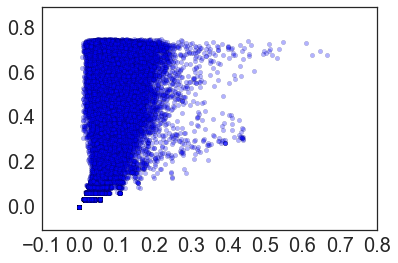

In [6]:
plt.scatter(total_info['info'], total_info['ind_info'], alpha = .3)

In [7]:
lfmm = pd.merge(lfmm, info, how = 'outer')
lfmm.head()

LFMM_ID    cpvals    zscore      info
0        1  0.514097 -0.547059  0.011783
1        2  0.760482 -0.255597  0.028070
2        3  0.395632 -0.712213  0.095528
3        4  0.948275 -0.054392  0.037019
4        5  0.487917 -0.581565  0.221278

#### Load fake map file - relates domID and LFMM_ID

In [8]:
complete_dom_map = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT','complete.dom.map'),sep = '\t', header = None)
complete_dom_map.columns = ['junkLG', 'domID', 'junk1', 'junk2']
complete_dom_map['stacks_CatID'] = [np.int(x.split('_')[0]) for x in complete_dom_map['domID']]
complete_dom_map['LFMM_ID'] = range(1, len(complete_dom_map)+1)
complete_dom_map.head()

junkLG domID  junk1  junk2  stacks_CatID  LFMM_ID
0       1   2_A      1      1             2        1
1       1   2_G      1      1             2        2
2       1  7_GG      1      1             7        3
3       1  7_TA      1      1             7        4
4       1  7_TG      1      1             7        5

In [9]:
lfmm_results = pd.merge(lfmm, complete_dom_map)
lfmm_results = lfmm_results[['LFMM_ID','cpvals','zscore', 'info','domID','stacks_CatID']]
lfmm_results.head()

LFMM_ID    cpvals    zscore      info domID  stacks_CatID
0        1  0.514097 -0.547059  0.011783   2_A             2
1        2  0.760482 -0.255597  0.028070   2_G             2
2        3  0.395632 -0.712213  0.095528  7_GG             7
3        4  0.948275 -0.054392  0.037019  7_TA             7
4        5  0.487917 -0.581565  0.221278  7_TG             7

#### Load linkage map

In [10]:
linkage_map = pd.read_csv(os.path.join('linkage_map','LEPmap','with_paralogs','final','PS_chum_map_2015.txt'),sep = '\t')
linkage_map.tail(500)
linkage_map[linkage_map['contig']== 'c48610']

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  LEP_LG  cM_OLD  \
2493  c48610        48610_A         32975   32975_46     5656       5   12.86   
2494  c48610        48610_A         32975   32975_75     5656       5   12.86   
2495  c48610        48610_A         32975   32975_82     5656       5   12.86   
2496  c48610        48610_A         32975   32975_92     5656       5   12.86   
2497  c48610        48610_B         32975   32975_46     5657       5   12.86   
2498  c48610        48610_B         32975   32975_75     5657       5   12.86   
2499  c48610        48610_B         32975   32975_82     5657       5   12.86   
2500  c48610        48610_B         32975   32975_92     5657       5   12.86   
2501  c48610        48610_D         32975   32975_46     5658       5   17.10   
2502  c48610        48610_D         32975   32975_75     5658       5   17.10   
2503  c48610        48610_D         32975   32975_82     5658       5   17.10   
2504  c48610        48610_D         32975   32975_92     5658       5   17.10   
2505  c48610        48610_E         32975   32975_46     5659       5   17.73   
2506  c48610        48610_E         32975   32975_75     5659       5   17.73   
2507  c48610        48610_E         32975   32975_82     5659       5   17.73   
2508  c48610        48610_E         32975   32975_92     5659       5   17.73   

      paper1_LG      cM  
2493          2  124.60  
2494          2  124.60  
2495          2  124.60  
2496          2  124.60  
2497          2  124.60  
2498          2  124.60  
2499          2  124.60  
2500          2  124.60  
2501          2  120.36  
2502          2  120.36  
2503          2  120.36  
2504          2  120.36  
2505          2  119.73  
2506          2  119.73  
2507          2  119.73  
2508          2  119.73

#### Look at the input to lepmap

this locus was not combined across families

## Scored separately across families

In [11]:
lepmap_file = pd.read_csv(os.path.join('linkage_map','LEPmap','with_paralogs','collapsed_loci.lepmap'), sep = '\t')
lepmap_file[['#family','name'] + linkage_map[linkage_map['contig']== 'c48610']['resolved_locus'].drop_duplicates().tolist()].head()

#family             name 48610_A 48610_B 48610_D 48610_E
0  fam_08       fam_08_Dam     1 1     1 1     1 1     1 1
1  fam_08      fam_08_Sire     1 2     1 2     1 2     1 2
2  fam_08  CMUW10X08H_0002     0 0     0 0     1 1     1 1
3  fam_08  CMUW10X08H_0003     0 0     0 0     0 0     0 0
4  fam_08  CMUW10X08H_0005     0 0     0 0     1 2     1 2

In [12]:
lep_subset = lepmap_file[['#family','name'] + linkage_map[linkage_map['contig']== 'c48610']['resolved_locus'].drop_duplicates().tolist()]
lep_subset.replace('0 0', np.nan ).groupby('#family').count()

name  48610_A  48610_B  48610_D  48610_E
#family                                          
fam_01     36        2        2        2        2
fam_08    177        2        2      139      139
fam_09     33       29       29        2        2

In [13]:
lfmm_results_with_map = pd.merge(lfmm_results, linkage_map, how = 'outer').drop_duplicates(subset = 'domID')
print lfmm_results_with_map.shape
lfmm_results_with_map.head()

(35580, 14)


LFMM_ID    cpvals    zscore      info domID  stacks_CatID  contig  \
0      1.0  0.514097 -0.547059  0.011783   2_A           2.0  c10003   
1      2.0  0.760482 -0.255597  0.028070   2_G           2.0  c10003   
2      3.0  0.395632 -0.712213  0.095528  7_GG           7.0   c1000   
4      4.0  0.948275 -0.054392  0.037019  7_TA           7.0   c1000   
6      5.0  0.487917 -0.581565  0.221278  7_TG           7.0   c1000   

  resolved_locus stacks_SNP  LEPname  LEP_LG  cM_OLD  paper1_LG     cM  
0        10003_A       2_78      2.0    19.0   58.39        5.0  58.39  
1        10003_A       2_78      2.0    19.0   58.39        5.0  58.39  
2         1000_C       7_74      3.0    11.0   53.54       32.0  53.54  
4         1000_C       7_74      3.0    11.0   53.54       32.0  53.54  
6         1000_C       7_74      3.0    11.0   53.54       32.0  53.54

In [14]:
lfmm_results_with_map = lfmm_results_with_map.dropna(subset=['zscore'])

## determine candidates

In [15]:
import statsmodels.sandbox.stats.multicomp
reject_null, fdr_pval, alphacSidak, alphacBonf = statsmodels.sandbox.stats.multicomp.multipletests(lfmm_results_with_map['cpvals'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
lfmm_results_with_map['fdr_pval'] = fdr_pval
lfmm_results_with_map['reject_null'] = reject_null
lfmm_results_with_map['mlog10(fdr_pval)_LFMM'] = -np.log10(lfmm_results_with_map['fdr_pval'])
print lfmm_results_with_map['reject_null'].sum()
lfmm_results_with_map.head()

748


LFMM_ID    cpvals    zscore      info domID  stacks_CatID  contig  \
0      1.0  0.514097 -0.547059  0.011783   2_A           2.0  c10003   
1      2.0  0.760482 -0.255597  0.028070   2_G           2.0  c10003   
2      3.0  0.395632 -0.712213  0.095528  7_GG           7.0   c1000   
4      4.0  0.948275 -0.054392  0.037019  7_TA           7.0   c1000   
6      5.0  0.487917 -0.581565  0.221278  7_TG           7.0   c1000   

  resolved_locus stacks_SNP  LEPname  LEP_LG  cM_OLD  paper1_LG     cM  \
0        10003_A       2_78      2.0    19.0   58.39        5.0  58.39   
1        10003_A       2_78      2.0    19.0   58.39        5.0  58.39   
2         1000_C       7_74      3.0    11.0   53.54       32.0  53.54   
4         1000_C       7_74      3.0    11.0   53.54       32.0  53.54   
6         1000_C       7_74      3.0    11.0   53.54       32.0  53.54   

   fdr_pval reject_null  mlog10(fdr_pval)_LFMM  
0  0.999973       False               0.000012  
1  0.999973       False               0.000012  
2  0.979034       False               0.009202  
4  0.999973       False               0.000012  
6  0.996818       False               0.001384

In [16]:
fdr_pval

array([ 0.99997252,  0.99997252,  0.97903409, ...,  0.99804521,
        0.99997252,  0.99997252])

## Summary plots

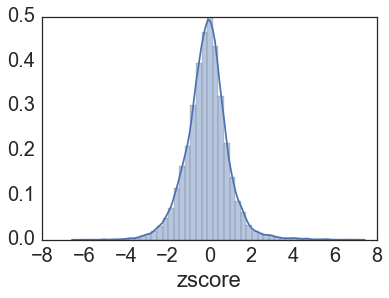

In [17]:
sns.distplot(lfmm_results_with_map['zscore'])
plt.show()

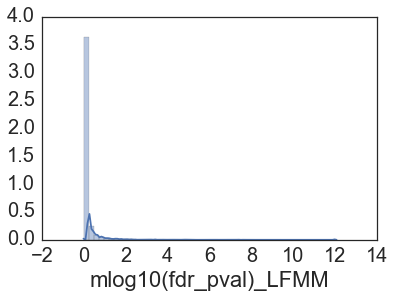

In [18]:
sns.distplot(lfmm_results_with_map['mlog10(fdr_pval)_LFMM'])
plt.show()

## genome scan

In [19]:
mapped_lfmm = lfmm_results_with_map[lfmm_results_with_map['paper1_LG'].notnull()]

In [20]:
cumpos = pd.DataFrame(mapped_lfmm.groupby('paper1_LG')['cM'].max().cumsum())
cumpos.index = cumpos.index+1
cumpos.set_value(1, 'cM', 0)
cumpos = cumpos.sort_index()
cumpos['cM_pad'] = cumpos['cM'] + np.arange(0,750, 20)
cumpos = cumpos[['cM_pad']]
cumpos.head()

cM_pad
paper1_LG        
1.0          0.00
2.0        126.08
3.0        279.96
4.0        359.74
5.0        499.22

In [21]:
genome_stats = pd.merge(mapped_lfmm, cumpos, right_index=True, left_on = 'paper1_LG')
genome_stats['cM_padded'] = genome_stats['cM'] + genome_stats['cM_pad']

genome_stats.tail()

LFMM_ID    cpvals    zscore      info     domID  stacks_CatID contig  \
57778  35121.0  0.564129  0.483546  0.253066  67801_AT       67801.0   c953   
57972  35256.0  0.844697  0.164242  0.092331   68268_A       68268.0  c9758   
57973  35257.0  0.699037 -0.324159  0.066946   68268_T       68268.0  c9758   
57996  35270.0  0.081779 -1.459270  0.039259   68328_C       68328.0  c9788   
57997  35271.0  0.099128 -1.382670  0.124676   68328_T       68328.0  c9788   

      resolved_locus stacks_SNP  LEPname  LEP_LG  cM_OLD  paper1_LG     cM  \
57778            953   67801_69  11987.0    30.0    0.42       15.0   0.42   
57972           9758    68268_6  12031.0    30.0   19.15       15.0  19.15   
57973           9758    68268_6  12031.0    30.0   19.15       15.0  19.15   
57996           9788   68328_61  12041.0    30.0    2.94       15.0   2.94   
57997           9788   68328_61  12041.0    30.0    2.94       15.0   2.94   

       fdr_pval reject_null  mlog10(fdr_pval)_LFMM   cM_pad  cM_padded  
57778  0.999973       False               0.000012  1452.48    1452.90  
57972  0.999973       False               0.000012  1452.48    1471.63  
57973  0.999973       False               0.000012  1452.48    1471.63  
57996  0.604314       False               0.218738  1452.48    1455.42  
57997  0.650836       False               0.186528  1452.48    1455.42

## flag duplicates

In [22]:
genome_stats['paralog'] = ['_' in xx for xx in genome_stats['resolved_locus']]

In [23]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)

LFMM_ID        cpvals    zscore      info        domID  stacks_CatID  \
27767  17394.0  1.322859e-09 -5.084810  0.104613   32975_TCAC       32975.0   
27751  17393.0  1.882237e-09 -5.037070  0.052539   32975_CTTA       32975.0   
27799  17396.0  2.665995e-09 -4.989520  0.052539   32975_CCTC       32975.0   
27719  17391.0  3.965623e-09 -4.934750  0.022968   32975_TTAC       32975.0   
27815  17397.0  8.389086e-09 -4.829800  0.136646   32975_CCAC       32975.0   
27783  17395.0  1.257493e-07 -4.431110  0.024297   32975_CTTC       32975.0   
27735  17392.0  2.890013e-07 -4.301610  0.036253   32975_TCAA       32975.0   
27703  17390.0  3.670629e-07 -4.263720  0.077845   32975_CTAC       32975.0   
33694  20647.0  1.401971e-06 -4.045250  0.052138   38015_GCTC       38015.0   
37951  22986.0  1.789623e-06  4.004260  0.100476    41176_GGT       41176.0   
37954  22987.0  1.782317e-06  4.004950  0.027638    41176_TGT       41176.0   
33682  20644.0  1.936874e-06 -3.990900  0.105052   38015_ACCC       38015.0   
33674  20642.0  4.929653e-06 -3.829800  0.057711   38015_GCCT       38015.0   
37957  22988.0  6.421881e-06  3.783050  0.077965    41176_GGA       41176.0   
37942  22983.0  6.834636e-06  3.771960  0.109457    41176_TGA       41176.0   
37945  22984.0  6.975167e-06  3.768330  0.020455    41176_TAT       41176.0   
25642  16120.0  1.000565e-05 -3.703440  0.088587     30915_CG       30915.0   
33686  20645.0  1.098829e-05 -3.686420  0.077003   38015_GTCC       38015.0   
37948  22985.0  1.118428e-05  3.683200  0.032912    41176_GAA       41176.0   
47382  28345.0  1.313844e-05 -3.653750  0.045275     49222_TC       49222.0   
33678  20643.0  1.896675e-05 -3.585780  0.035617   38015_GTCT       38015.0   
33690  20646.0  3.037271e-05 -3.496850  0.038261   38015_GCCC       38015.0   
41239  24741.0  3.126077e-05 -3.491340  0.078908      43590_T       43590.0   
33741  20679.0  3.224071e-05 -3.485430  0.076688   38052_CCGG       38052.0   
47384  28346.0  3.863346e-05 -3.450610  0.026504     49222_AT       49222.0   
25650  16121.0  4.556598e-05 -3.418560  0.084400     30915_GG       30915.0   
41240  24742.0  6.179850e-05 -3.358660  0.064802      43590_G       43590.0   
33737  20678.0  9.202173e-05 -3.278910  0.043308   38052_CTGA       38052.0   
33729  20676.0  9.872695e-05 -3.264640  0.019002   38052_CCAG       38052.0   
25634  16119.0  1.131796e-04 -3.236760  0.094405     30915_CC       30915.0   
...        ...           ...       ...       ...          ...           ...   
52936  31791.0  6.033086e-01 -0.435695  0.107967      55579_G       55579.0   
53115  31923.0  5.428597e-01 -0.510187  0.111821      55840_C       55840.0   
53208  31978.0  5.910627e-01  0.450492  0.085032    55935_GAA       55935.0   
53374  32092.0  5.261587e-01  0.531472  0.148048      56180_G       56180.0   
53375  32093.0  5.054311e-01  0.558376  0.128497      56180_A       56180.0   
53684  32307.0  5.597396e-01 -0.489003  0.111725      56599_C       56599.0   
53879  32412.0  6.240414e-01  0.410946  0.107134      56786_A       56786.0   
53880  32413.0  7.638037e-01  0.251943  0.048335      56786_C       56786.0   
54391  32724.0  8.013142e-01 -0.210991  0.084227      57342_C       57342.0   
54392  32725.0  5.112685e-01 -0.550742  0.059214      57342_A       57342.0   
55063  33228.0  9.587878e-01  0.043326  0.106767      58325_G       58325.0   
55064  33229.0  8.937696e-01 -0.111962  0.068347      58325_T       58325.0   
55258  33364.0  6.505196e-01  0.379848  0.050642      59068_A       59068.0   
55259  33365.0  9.668925e-01  0.034800  0.110930      59068_G       59068.0   
57070  34654.0  6.543554e-01  0.375387  0.139286      66417_T       66417.0   
57071  34655.0  9.437763e-01  0.059131  0.025077      66417_C       66417.0   
57088  34667.0  5.797108e-01  0.464335  0.145384      66448_G       66448.0   
57089  34668.0  8.856480e-01 -0.120579  0.154835      66448_C       66448.0   
57778  35121.0  5.641287e-01  0.483546  0.253066     6780

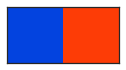

In [26]:
colors = ["blue", "red orange"]
sns.palplot(sns.xkcd_palette(colors))

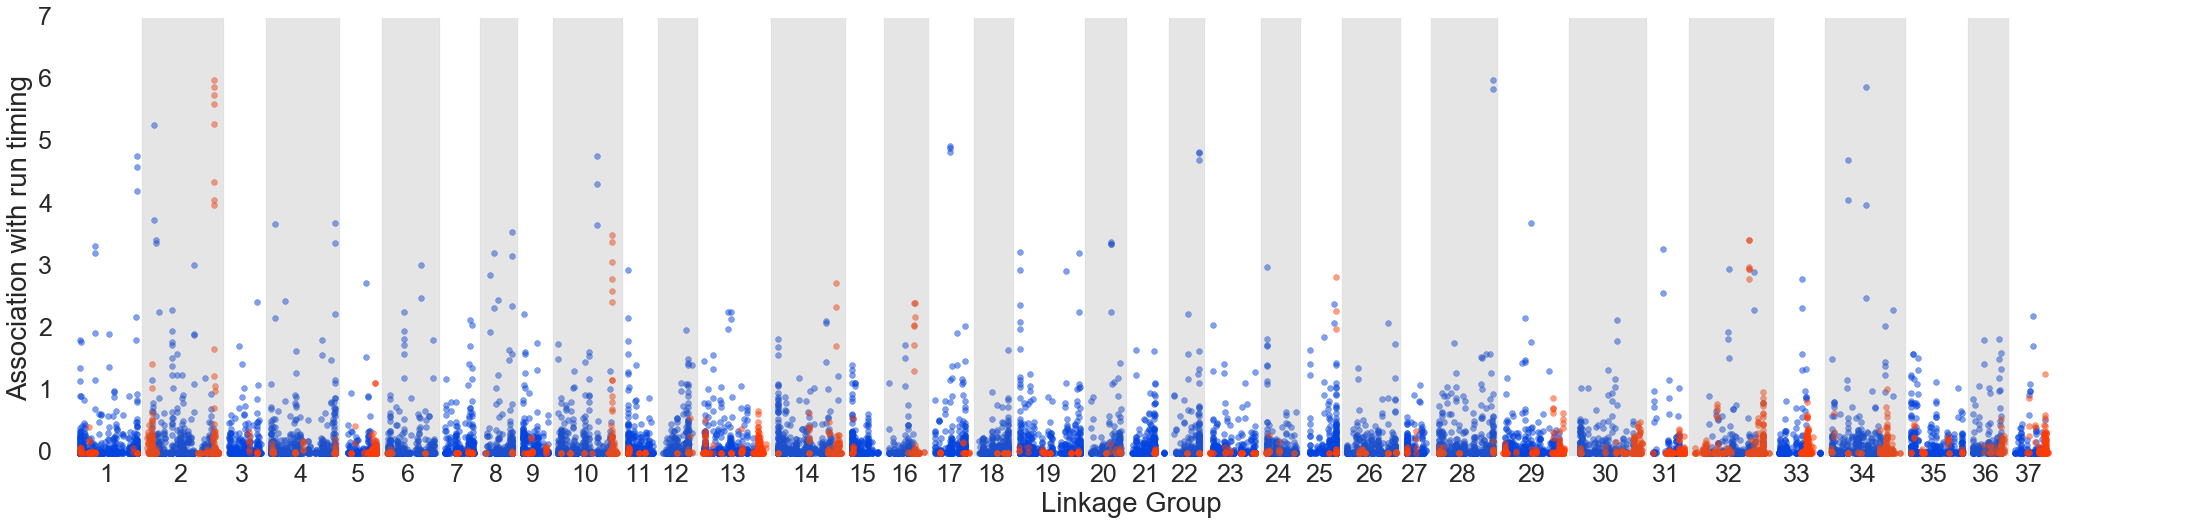

In [48]:
sns.set(font_scale=2.5, style = "white")
kws = dict(s=35, linewidth=.5, alpha = .5)

stat = 'mlog10(fdr_pval)_LFMM'


g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=['o', 'o']),
           size = 8, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', 'Association with run timing')
sns.despine(left=True, bottom = True)

# gray shading
currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1

plt.savefig(os.path.join('paper', 'figures', 'Figure 7 LFMM.png'))
plt.savefig(os.path.join('paper', 'figures', 'Figure 7 LFMM.pdf'))

plt.show()

## Informativeness

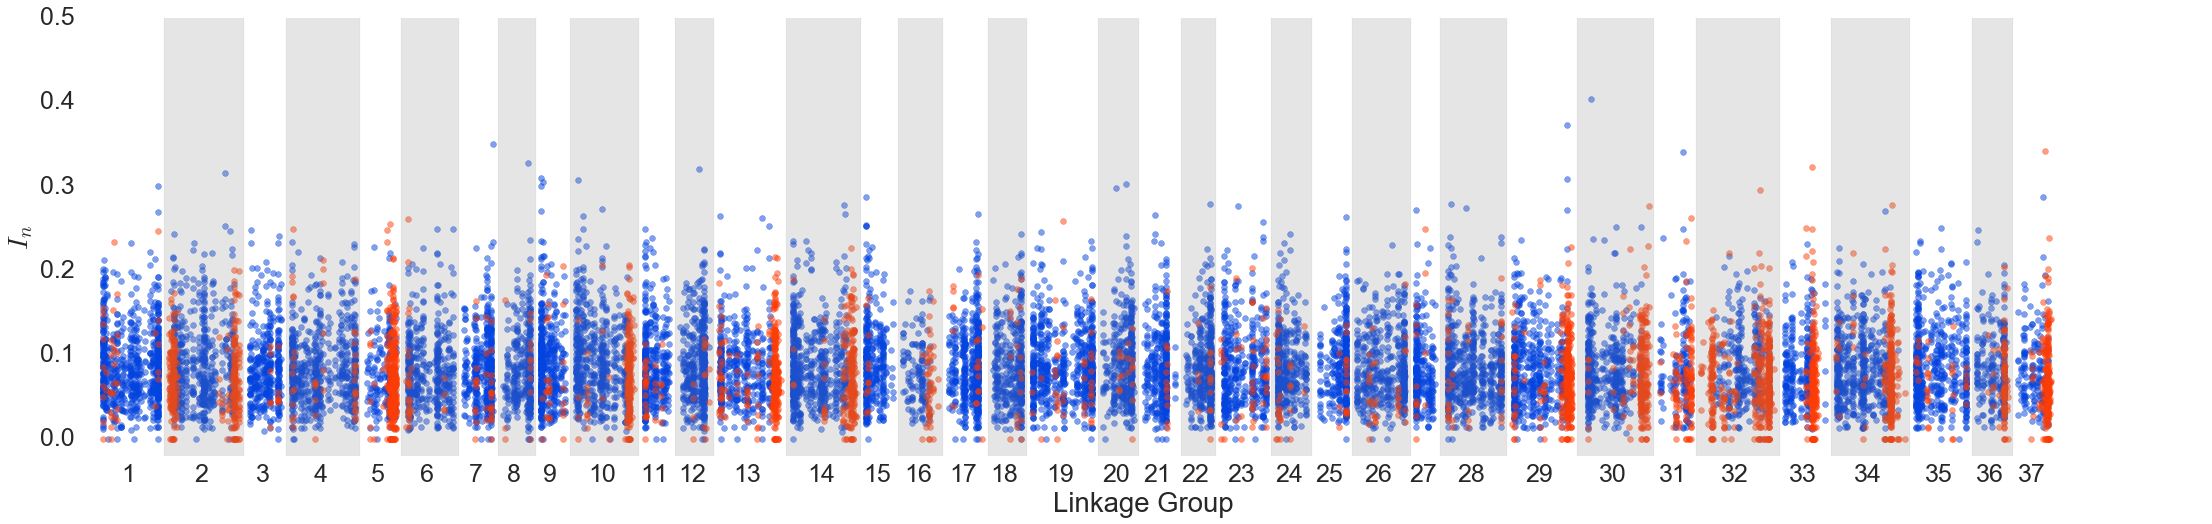

In [47]:
stat = 'info'

g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=["o", 'o']),
           size = 8, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', stat, **kws))

g.set(xlim=-40, ylim = -.02)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', r'$I_{n}$')
sns.despine(left=True, bottom = True)

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1
    
plt.savefig(os.path.join('paper', 'figures', 'Figure 6 I_n.png'))
plt.savefig(os.path.join('paper', 'figures', 'Figure 6 I_n.pdf'))

plt.show()

In [ ]:
sns.xkcd_palette(colors)

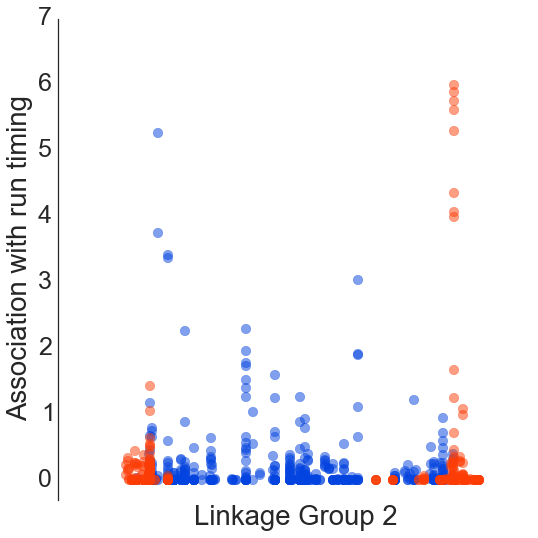

In [38]:
sns.set(font_scale=2.5, style = "white")
stat = 'mlog10(fdr_pval)_LFMM'
kws = dict(s=90, linewidth=.5, alpha = .5)

g = sns.FacetGrid(data = genome_stats[genome_stats['paper1_LG'] == 2], sharex=False, hue_kws=dict(marker=["o", 'o']),
           size = 8, aspect = 1, palette=sns.xkcd_palette(reversed(colors)), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(ylim = -.3)
g.set(xticks=[], xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group 2', 'Association with run timing')
sns.despine(left=False, bottom = True)
    
plt.savefig(os.path.join('paper', 'figures', 'supplemental', 'LFMM_dom_LG2.png'))
plt.show()

In [ ]:
sns.set(font_scale=2.5, style = "white")
stat = 'mlog10(fdr_pval)_LFMM'
kws = dict(s=50, linewidth=.5, alpha = .8)


g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=["o", '+']),
           size = 12, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', stat)
sns.despine(left=False, bottom = True)

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1

In [ ]:
genome_stats[genome_stats['paralog'] == True]['info'].mean()

In [ ]:
genome_stats[genome_stats['paralog'] == False]['info'].mean()

In [ ]:
### Look at the raw (dominance) genotypes

In [ ]:
## load the lfmm file and env file

In [ ]:
lfmm_dom_in = pd.read_csv(os.path.join('results','batch_4','LFMM','complete.dom.lfmm'),sep = ' ', header = None)
lfmm_dom_in.columns = [x+1 for x in lfmm_dom_in.columns]
lfmm_dom_in.head()

In [ ]:
lfmm_assess = lfmm_dom_in.replace('9', np.nan)

In [ ]:
sns.distplot(lfmm_assess.sum(axis = 0)/174)

In [ ]:
##

In [ ]:
(lfmm_assess.sum(axis = 0)/174 > .05) & (lfmm_assess.sum(axis = 0)/174 < .95)

In [ ]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]

In [ ]:
lfmm_subset = lfmm_dom_in[genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]['LFMM_ID'].tolist()].copy()
lfmm_subset['env'] = env['env']
lfmm_subset = lfmm_subset.replace(9, np.nan).dropna()
lfmm_subset.tail()

In [ ]:
lfmm_subset.groupby('env').mean()

In [ ]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]['LFMM_ID'].tolist()

In [ ]:
lfmm_dom_in.T.head()

In [ ]:
env = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/LFMM/basic.env', header = None)
env.columns = ['env']
env.head()

In [ ]:
genome_stats.head()

In [ ]:
assert False

In [ ]:
pop_fst = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/non_paralogs.fst', sep= '\t')
pop_fst.rename(columns = {'SNP':'stacks_SNP'}, inplace=True)
pop_fst.head()

In [ ]:
lfmm_map = pd.merge(lfmm_map, pop_fst, left_on='stacksID', right_on='stacks_SNP')

In [ ]:
linkage_map = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/final/PS_chum_map_2015.txt',sep = '\t')
linkage_map.head()

In [ ]:
mapped_lfmm = pd.merge(linkage_map, lfmm_map, left_on='stacks_SNP', right_on='stacksID', how = 'right')
mapped_lfmm.shape

In [ ]:
mapped_lfmm = mapped_lfmm.sort(columns=['paper1_LG', 'cM'])
mapped_lfmm['manhattan_order'] = range(1, len(mapped_lfmm)+1)
mapped_lfmm.head()

In [ ]:
mapped_lfmm.to_csv(os.path.join('results','batch_4','LFMM', 'mapped_lfmm.txt'), index = False, sep = '\t')

# Plots

In [ ]:
sns.distplot(lfmm['mlog10val'])
plt.show()
sns.distplot(mapped_lfmm['mlog10val'])
plt.show()

In [ ]:
plt.scatter(x =mapped_lfmm['FST'] , y =mapped_lfmm['mlog10val'], alpha = .2)

In [ ]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'mlog10val', fit_reg=False, hue = 'plinkLG', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=0)
sns.despine(left=True)

In [ ]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'FST', fit_reg=False, hue = 'plinkLG', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=0)
sns.despine(left=True)

In [ ]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'mlog10val', fit_reg=False, hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)

In [ ]:
#figsize(10,10)
g = sns.lmplot(data = mapped_lfmm, x = 'cM', y = 'mlog10val', fit_reg=False, row = 'plinkLG', hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 2, 
           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)

In [ ]:
#figsize(10,10)
g = sns.lmplot(data = mapped_lfmm, x = 'cM', y = 'FST', fit_reg=False, row = 'plinkLG', hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 2, 
           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)